<a href="https://colab.research.google.com/github/jessysu/attnmod/blob/main/AttnMod_SD15_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
# Other versions of diffusers might work. Try at your own risk
!pip install diffusers==0.30.2
!git clone https://github.com/jessysu/attnmod
%cd attnmod

# Default Huggingface SD15 diffuser output

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You have disabled the safety checker for <class 'attnmod.attnmod_pipelines.AttnModPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

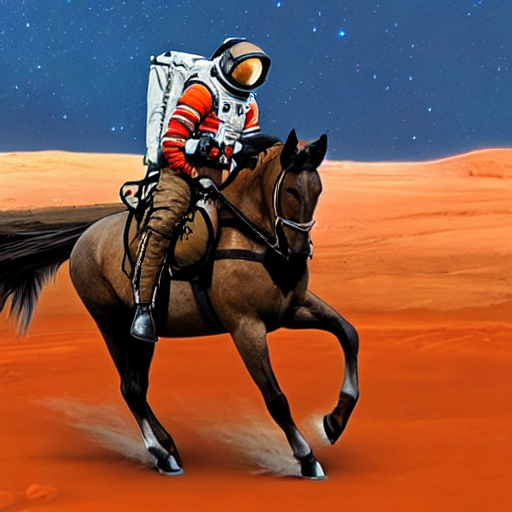

In [30]:
import torch
from attnmod import AttnModPipeline

pipeline = AttnModPipeline.from_pretrained(
    "sd-legacy/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    safety_checker=None,
).to("cuda")


prompts = ["a photo of an astronaut riding a horse on mars"]
generator = torch.Generator(device="cpu").manual_seed(7)
images = pipeline(prompt=prompts, generator=generator).images
images[0]

# AttnMod

  0%|          | 0/50 [00:00<?, ?it/s]

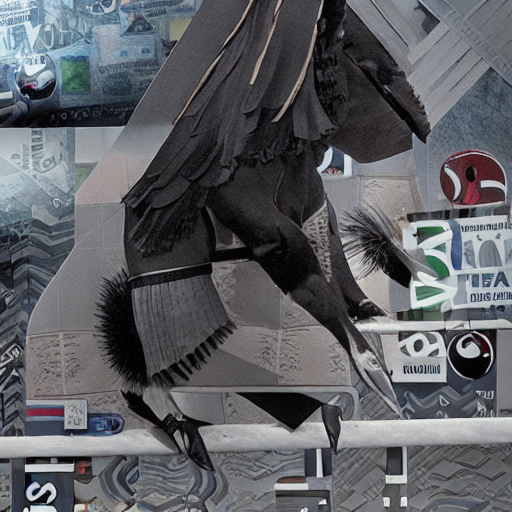

In [42]:
attnmod = {
    'up_blocks.1.attentions.0.transformer_blocks.0.attn2.processor': {"start": -10, "increment": 0.05},
}
generator = torch.Generator(device="cpu").manual_seed(7)
images = pipeline(prompt=prompts, generator=generator, attnmod=attnmod).images
images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

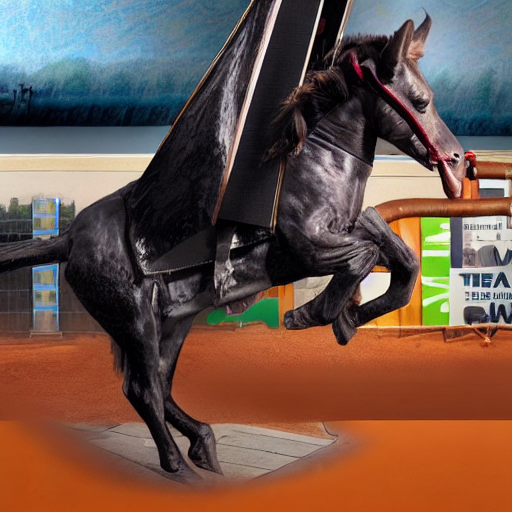

In [41]:
attnmod = {
    'up_blocks.1.attentions.0.transformer_blocks.0.attn2.processor': {"start": -5, "increment": 0.02},
}
generator = torch.Generator(device="cpu").manual_seed(7)
images = pipeline(prompt=prompts, generator=generator, attnmod=attnmod).images
images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

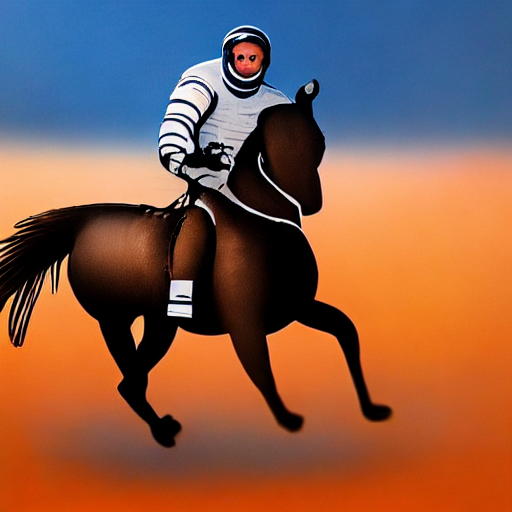

In [36]:
attnmod = {
    'down_blocks.1.attentions.1.transformer_blocks.0.attn1.processor': {"start": 1, "increment": -0.1},
}
generator = torch.Generator(device="cpu").manual_seed(7)
images = pipeline(prompt=prompts, generator=generator, attnmod=attnmod).images
images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

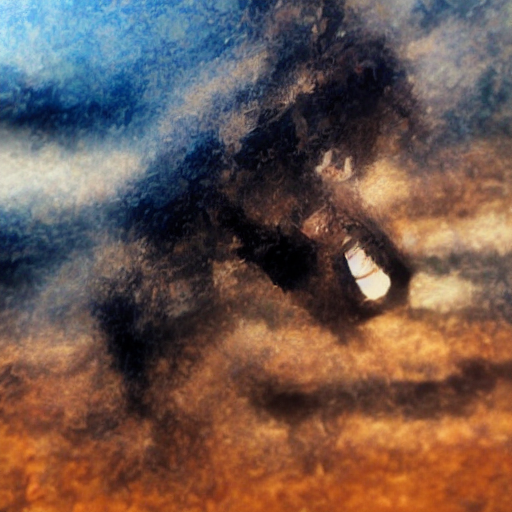

In [40]:
attnmod = {
    'down_blocks.1.attentions.1.transformer_blocks.0.attn1.processor': {"start": 1, "increment": -0.1},
    'up_blocks.1.attentions.0.transformer_blocks.0.attn2.processor': {"start": -5, "increment": 0.02},
}
generator = torch.Generator(device="cpu").manual_seed(7)
images = pipeline(prompt=prompts, generator=generator, attnmod=attnmod).images
images[0]

# Pick the blocks you like

In [43]:
pipeline.unet.attn_processors.keys()

dict_keys(['down_blocks.0.attentions.0.transformer_blocks.0.attn1.processor', 'down_blocks.0.attentions.0.transformer_blocks.0.attn2.processor', 'down_blocks.0.attentions.1.transformer_blocks.0.attn1.processor', 'down_blocks.0.attentions.1.transformer_blocks.0.attn2.processor', 'down_blocks.1.attentions.0.transformer_blocks.0.attn1.processor', 'down_blocks.1.attentions.0.transformer_blocks.0.attn2.processor', 'down_blocks.1.attentions.1.transformer_blocks.0.attn1.processor', 'down_blocks.1.attentions.1.transformer_blocks.0.attn2.processor', 'down_blocks.2.attentions.0.transformer_blocks.0.attn1.processor', 'down_blocks.2.attentions.0.transformer_blocks.0.attn2.processor', 'down_blocks.2.attentions.1.transformer_blocks.0.attn1.processor', 'down_blocks.2.attentions.1.transformer_blocks.0.attn2.processor', 'up_blocks.1.attentions.0.transformer_blocks.0.attn1.processor', 'up_blocks.1.attentions.0.transformer_blocks.0.attn2.processor', 'up_blocks.1.attentions.1.transformer_blocks.0.attn1.pr

# Happy modding